# I. Project Introduction

The electroencephalogram (EEG) is utilized to detect the electrical activity of the brain. Everyday activities such as reading, listening to music, writing and the use of technology cause changes in brain wave patterns. Proper understanding of these differences possesses a strong foundation for the understanding of how the brain processes information. Currently, the EEG is used in studies for ADHD, alzheimers, epilepsy, etc. Understanding brain wave activity could play a crucial role future studies regarding learning, cognition and memory. With the progression of technology, EEG electrodes can be engineered when a desire to conduct brain wave activity research. However, when these self engineered tools are used the reliability of the apparatus must be dependable, accurate and show the ability to produce precise data. 

The current project will be conducted to analyze the readings of the self-engineered EEG to determine if this tool can be used in a research study and produce reliable data. For the project, the researcher was the test subject and he read during one trial and listened to music during another trial. The data will be used to predict if the microvolt values obtained using the 4-channel electrode were realistic values. Moreover, a correlation for each channel during each task will be conducted to determine which task tends to result in the most brain activity. 

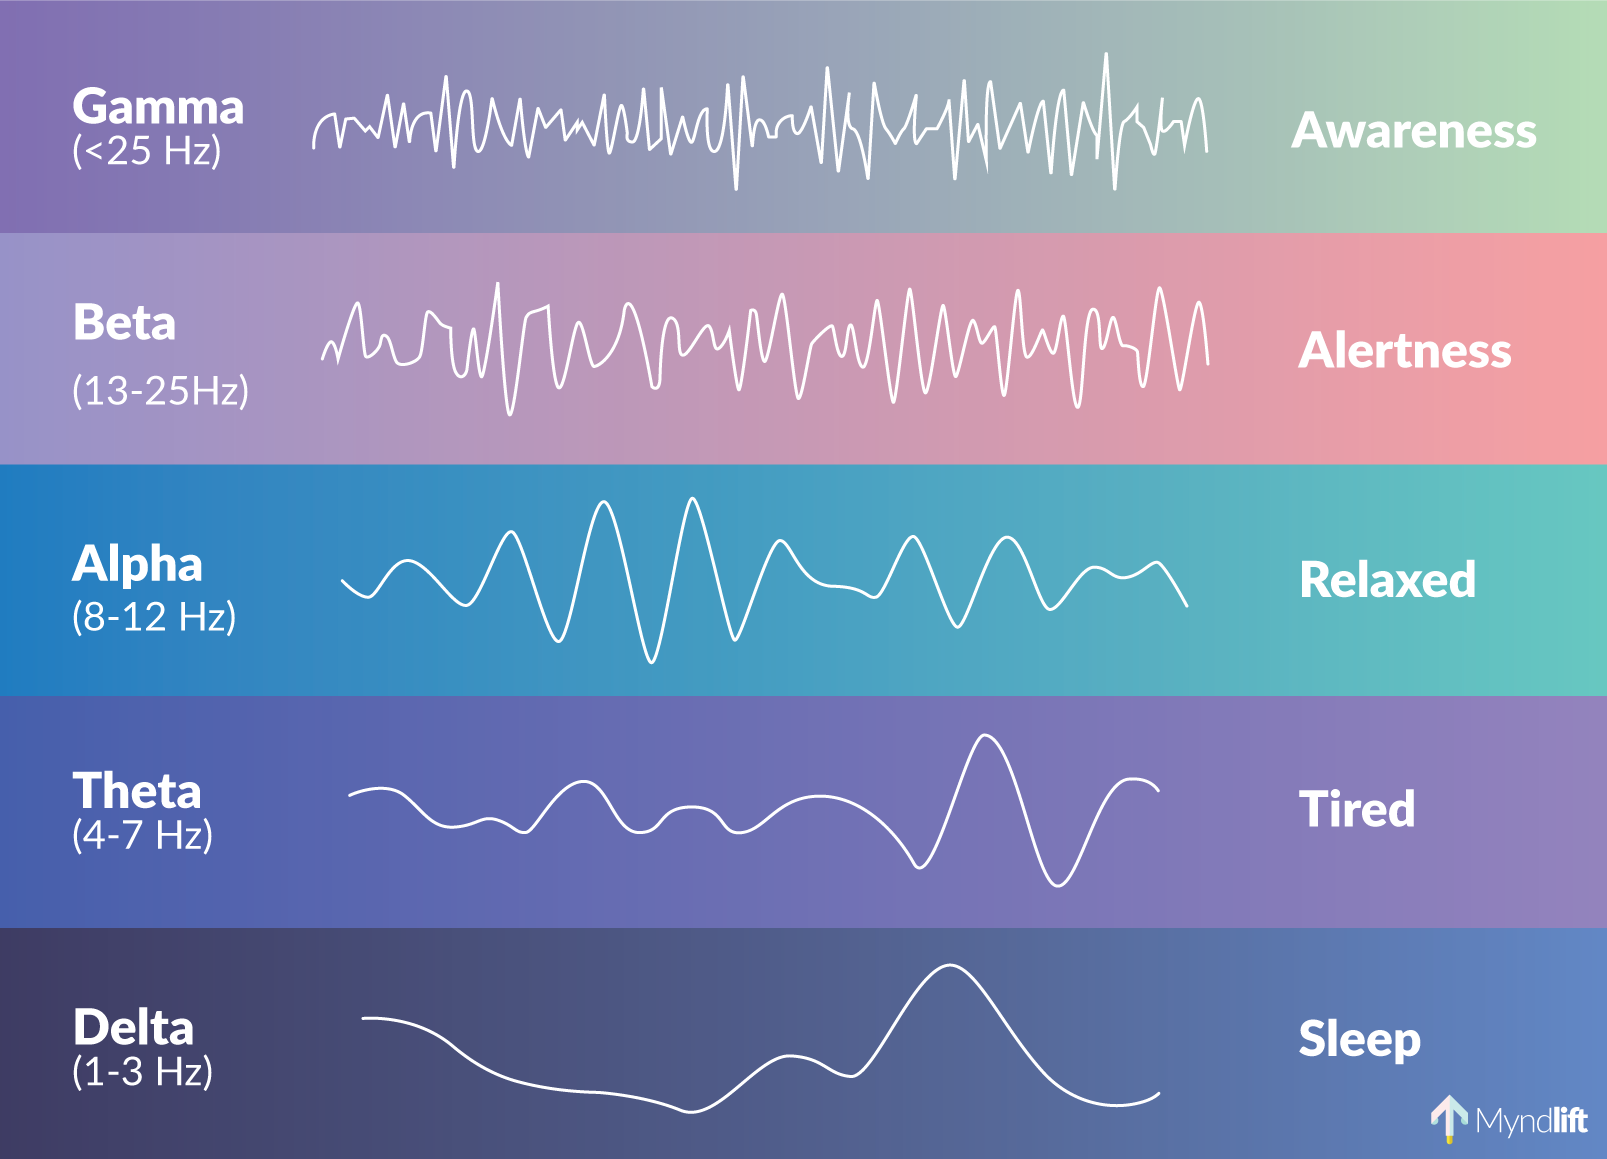

In [367]:
from IPython.display import display, Image
display(Image(filename='brainwaves.png'))


# II. Data Introduction
The data used in this notebook is free and open at:
https://www.kaggle.com/millerintllc/eeg-microexperiment

## Dataset Download
Music_EEG: https://www.kaggle.com/millerintllc/eeg-microexperiment#tiny_eeg_self_experiment_music.csv 

Reading_EEG: https://www.kaggle.com/millerintllc/eeg-microexperiment#tiny_eeg_self_experiment_reading.csv 

## Dataset Details
Donor:

Jason Miller and Light and Latitude, LLC

contact info: linkedin.com/in/jghdatasci

Data Set Information:
The music and reading EEG trials were conducted for 3-4 minutes to record the brain wave activity associated with the tasks.

 The test subject throughout various trials using the 200Hz 4-channel EEG with gold-tipped electrodes was the researcher. The other components used were a 4-channel Ganglion development board, an elastic EEG cap and both python and Open BCI software.

# III. Outline and Goals of the Project

1. The import of various packages discussed throughout the machine learning course will be uploaded to ensure all packages are available for use. 

2. Basic information about the EEG datasets will be uploaded (music, reading and music vs reading).

3. Evaluate the datasets with respect to the time of day as well as the Time in seconds in which it took to complete each task.

4. Conduct statistical analysis for the comparison of each of the four channels to each other during each task.

5. Generate a correlation heatmap between the channels for each task. 

5. Conduct a cluster report regarding the full set of data to determine which channel readings were most similar and during which task. 

# IV. Information about the EEG datasets

## 1) Data Background
A. The dataset was published on Kaggle by Jason Miller.

B. The company supporting the data is Light and Latitude, LLC. 

C. The dataset only includes one subject, the researcher.

D. The researcher streamed music on an IoT device for the music study and read scholarly articles about wave signal analysis for the reading study. 

E. The datasets include values for each of the 4 channels measured in microvolts, the acceleration of the voltage reading, and timestamp values.

## 2) Module Import

In [168]:
#import of packages for graphing analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## 3) Dataset Import
A. Music_EEG

In [4]:
#Load Modified Music_EEG CSV file
data_musicEEG = pd.read_csv("tiny_eeg_self_experiment_music_ML.csv")
data_musicEEG.head()

,IndexId,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Ref1,Ref2,Ref3,TS1,TS2,Time of Day in Seconds
0,0,933.19,519.23,21.71,238.45,0,0,0,20:04:02,1.540000e+12,72242
1,1,932.94,516.98,22.70,251.80,0,0,0,20:04:02,1.540000e+12,72242
2,2,827.70,521.87,17.26,207.42,0,0,0,20:04:02,1.540000e+12,72242
3,3,893.26,519.82,18.90,219.49,0,0,0,20:04:02,1.540000e+12,72242
4,4,953.94,520.69,21.88,252.06,0,0,0,20:04:02,1.540000e+12,72242


B. Reading_EEG

In [5]:
#Load Modified Reading_EEG CSV file
data_readingEEG = pd.read_csv("tiny_eeg_self_experiment_reading_ML.csv")
data_readingEEG.head()

,IndexId,Channel 1R,Channel 2R,Channel 3R,Channel 4R,Ref1,Ref2,Ref3,TS1,TS2,Time of Day in Seconds
0,0,963.44,281.28,71.98,401.54,0.0,0.0,0.0,20:25:24,1.540000e+12,73524.0
1,1,1011.33,353.28,51.57,379.71,0.0,0.0,0.0,20:25:24,1.540000e+12,73524.0
2,2,979.95,321.36,107.42,440.38,0.0,0.0,0.0,20:25:24,1.540000e+12,73524.0
3,3,934.42,262.01,111.16,441.09,0.0,0.0,0.0,20:25:24,1.540000e+12,73524.0
4,4,996.12,306.95,52.48,386.58,0.0,0.0,0.0,20:25:24,1.540000e+12,73524.0


In [6]:
data_musicEEG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39647 entries, 0 to 39646
Data columns (total 11 columns):
IndexId                   39647 non-null int64
Channel 1M                39647 non-null float64
Channel 2M                39647 non-null float64
Channel 3M                39647 non-null float64
Channel 4M                39647 non-null float64
Ref1                      39647 non-null int64
Ref2                      39647 non-null int64
Ref3                      39647 non-null int64
TS1                       39647 non-null object
TS2                       39647 non-null float64
Time of Day in Seconds    39647 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.3+ MB


In [7]:
data_readingEEG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38256 entries, 0 to 38255
Data columns (total 11 columns):
IndexId                   38256 non-null int64
Channel 1R                38256 non-null float64
Channel 2R                38256 non-null float64
Channel 3R                38255 non-null float64
Channel 4R                38255 non-null float64
Ref1                      38255 non-null float64
Ref2                      38255 non-null float64
Ref3                      38255 non-null float64
TS1                       38255 non-null object
TS2                       38255 non-null float64
Time of Day in Seconds    38255 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 3.2+ MB


## 4) Music_EEG and Reading_ EEG datasets 

A. The amount of rows in the datasets are 39,647 for the Music_EEG dataset and 38,256 for the Reading_EEG dataset.

B. The datasets contain 10 columns, four of which will be used for the project: Channel 1, Channel 2, Channel 3, Channel 4. 

C. The channel data is measured with units of microvolts.

# V. Evaluation of Data

## 1) Isolation of the Channel values and Modified Time
A. Music_EEG

In [8]:
#Import music dataset file with time of day converted to seconds
data_musicEEG = pd.read_csv("tiny_eeg_self_experiment_music_ML.csv", index_col="IndexId")
data_musicEEG.drop(["Ref1", "Ref2", "Ref3", "TS1", "TS2"], axis = 1, inplace = True)
data_musicEEG.head()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Time of Day in Seconds
IndexId,,,,,
0,933.19,519.23,21.71,238.45,72242
1,932.94,516.98,22.70,251.80,72242
2,827.70,521.87,17.26,207.42,72242
3,893.26,519.82,18.90,219.49,72242
4,953.94,520.69,21.88,252.06,72242


In [9]:
data_musicEEG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39647 entries, 0 to 171
Data columns (total 5 columns):
Channel 1M                39647 non-null float64
Channel 2M                39647 non-null float64
Channel 3M                39647 non-null float64
Channel 4M                39647 non-null float64
Time of Day in Seconds    39647 non-null int64
dtypes: float64(4), int64(1)
memory usage: 1.8 MB


B. Reading_EEG

In [10]:
#Import music dataset file with time of day converted to seconds
data_readingEEG = pd.read_csv("tiny_eeg_self_experiment_reading_ML.csv", index_col="IndexId")
data_readingEEG.drop(["Ref1", "Ref2", "Ref3", "TS1", "TS2"], axis = 1, inplace = True)
data_readingEEG.head()

,Channel 1R,Channel 2R,Channel 3R,Channel 4R,Time of Day in Seconds
IndexId,,,,,
0,963.44,281.28,71.98,401.54,73524.0
1,1011.33,353.28,51.57,379.71,73524.0
2,979.95,321.36,107.42,440.38,73524.0
3,934.42,262.01,111.16,441.09,73524.0
4,996.12,306.95,52.48,386.58,73524.0


In [11]:
data_readingEEG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38256 entries, 0 to 139
Data columns (total 5 columns):
Channel 1R                38256 non-null float64
Channel 2R                38256 non-null float64
Channel 3R                38255 non-null float64
Channel 4R                38255 non-null float64
Time of Day in Seconds    38255 non-null float64
dtypes: float64(5)
memory usage: 1.8 MB


## 2) Correlation Matrices
A. Music_EEG

In [12]:
#Removal of the column for time of day in seconds for the music data 
data_musicEEG.drop(["Time of Day in Seconds"], axis = 1, inplace = True)
data_musicEEG.head()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M
IndexId,,,,
0,933.19,519.23,21.71,238.45
1,932.94,516.98,22.70,251.80
2,827.70,521.87,17.26,207.42
3,893.26,519.82,18.90,219.49
4,953.94,520.69,21.88,252.06


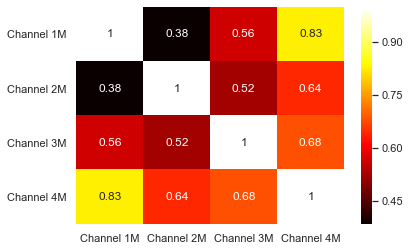

In [13]:
#Generate correlation heatmap for the music data
import seaborn as sns; sns.set()
sns.heatmap(data_musicEEG.corr(), annot=True,  vmax=1.0, cmap="hot")

In [14]:
#Removal of the column for time of day in seconds for the reading data
data_readingEEG.drop(["Time of Day in Seconds"], axis = 1, inplace = True)
data_readingEEG.head()

,Channel 1R,Channel 2R,Channel 3R,Channel 4R
IndexId,,,,
0,963.44,281.28,71.98,401.54
1,1011.33,353.28,51.57,379.71
2,979.95,321.36,107.42,440.38
3,934.42,262.01,111.16,441.09
4,996.12,306.95,52.48,386.58


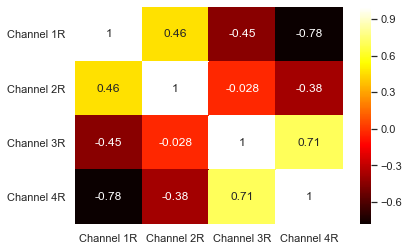

In [15]:
#Generate correlation heatmap for the reading data
import seaborn as sns; sns.set()
sns.heatmap(data_readingEEG.corr(), annot=True,  vmax=1.0, cmap='hot')

## 3) Data Description
A. Music_EEG

In [16]:
data_musicEEG.shape

(39647, 4)

In [17]:
data_musicEEG.nunique()

Channel 1M    23588
Channel 2M    12769
Channel 3M     5603
Channel 4M    19090
dtype: int64

In [18]:
data_musicEEG.describe()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M
count,39647.000000,39647.000000,39647.000000,39647.000000
mean,811.469740,424.160944,25.675518,153.763276
std,96.160618,46.437532,14.983653,65.450350
min,3.450000,17.040000,0.000000,1.020000
25%,734.770000,395.465000,14.700000,107.170000
50%,812.780000,410.980000,25.150000,150.110000
75%,886.965000,442.360000,35.960000,197.085000
max,1391.010000,1171.090000,317.740000,793.010000


B. Reading_EEG

In [19]:
data_readingEEG.shape

(38256, 4)

In [20]:
data_readingEEG.nunique()

Channel 1R    18156
Channel 2R    17045
Channel 3R    15410
Channel 4R    20706
dtype: int64

In [21]:
data_readingEEG.describe()

,Channel 1R,Channel 2R,Channel 3R,Channel 4R
count,38256.000000,38256.00000,38255.000000,38255.000000
mean,885.714737,260.91203,110.181319,557.736782
std,57.988815,98.49802,59.038638,74.022338
min,260.870000,56.34000,8.140000,0.330000
25%,843.687500,210.08750,62.540000,505.525000
50%,883.750000,263.00500,109.880000,559.520000
75%,928.190000,304.56250,157.955000,612.470000
max,1843.480000,4461.71000,1536.930000,1421.000000


# Data Analysis

## 1) Histograms
A. Music_EEG

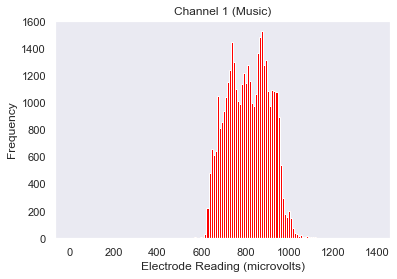

In [387]:
#Histogram of Channel 1 Music_EEG
Channel1M = data_music_vs_reading_EEG['Channel 1M']
plt.hist(Channel1M, 150, facecolor='red')
plt.title('Channel 1 (Music)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

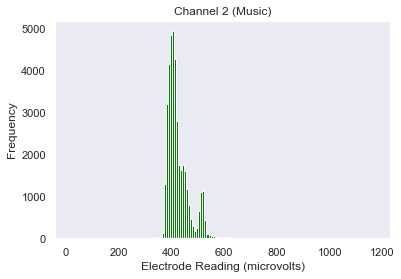

In [388]:
#Histogram of Channel 2 Music_EEG
Channel2M = data_music_vs_reading_EEG['Channel 2M']
plt.hist(Channel2M, 150, facecolor='green')
plt.title('Channel 2 (Music)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

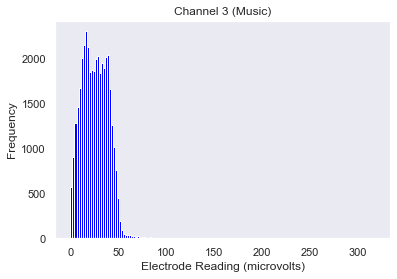

In [389]:
#Histogram of Channel 3 Music_EEG
Channel3M = data_music_vs_reading_EEG['Channel 3M']
plt.hist(Channel3M, 150, facecolor='blue')
plt.title('Channel 3 (Music)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

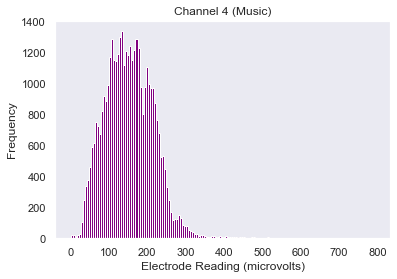

In [390]:
#Histogram of Channel 4 Music_EEG
Channel4M = data_music_vs_reading_EEG['Channel 4M']
plt.hist(Channel4M, 150, facecolor='purple')
plt.title('Channel 4 (Music)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

B. Reading_EEG

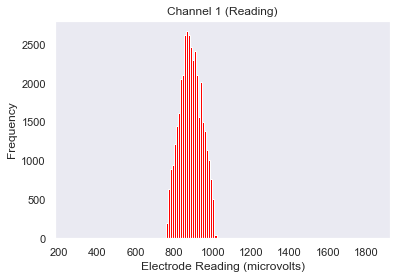

In [395]:
#Histogram of Channel 1 Reading_EEG
Channel1R = data_music_vs_reading_EEG['Channel 1R']
plt.hist(Channel1R, 150, facecolor='red')
plt.title('Channel 1 (Reading)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

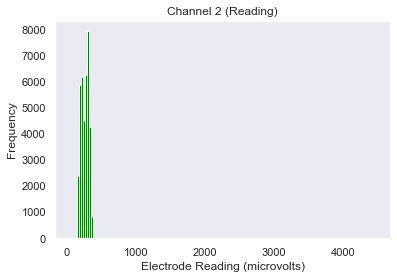

In [392]:
#Histogram of Channel 2 Reading_EEG
Channel2R = data_music_vs_reading_EEG['Channel 2R']
plt.hist(Channel2R, 150, facecolor='green')
plt.title('Channel 2 (Reading)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

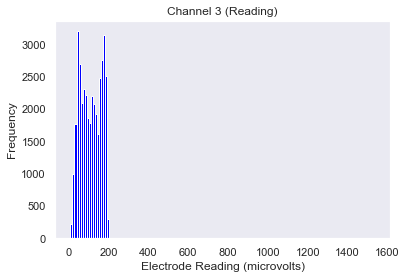

In [393]:
#Histogram of Channel 3 Reading_EEG
Channel3R = data_music_vs_reading_EEG['Channel 3R']
plt.hist(Channel3R, 150, facecolor='blue')
plt.title('Channel 3 (Reading)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

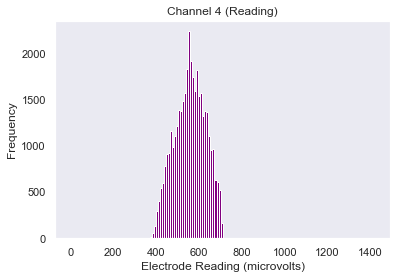

In [394]:
#Histogram of Channel 4 Reading_EEG
Channel4R = data_music_vs_reading_EEG['Channel 4R']
plt.hist(Channel4R, 150, facecolor='purple')
plt.title('Channel 4 (Reading)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# 2) Scatter Plots
A. Music_EEG

In [408]:
#Remove unwanted columns and generate scatterplots from uploaded dataframe file
df_musicEEG = pd.read_csv("tiny_eeg_self_experiment_music_ML.csv", index_col="IndexId")
df_musicEEG.drop(["Ref1", "Ref2", "Ref3", "TS1", "TS2"], axis = 1, inplace = True)
df_musicEEG

,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Time of Day in Seconds
IndexId,,,,,
0,933.19,519.23,21.71,238.45,72242
1,932.94,516.98,22.70,251.80,72242
2,827.70,521.87,17.26,207.42,72242
3,893.26,519.82,18.90,219.49,72242
4,953.94,520.69,21.88,252.06,72242
5,848.79,519.20,18.79,224.68,72242
6,845.51,516.32,24.37,207.32,72242
7,951.85,522.06,22.15,251.08,72242
8,894.98,525.64,21.90,241.74,72242


<Figure size 10800x10800 with 0 Axes>

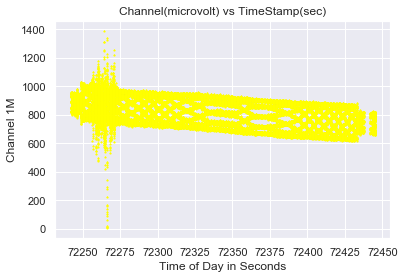

<Figure size 10800x10800 with 0 Axes>

In [415]:
#Scatterplot of Channel 1 Music_EEG
df_musicEEG.plot.scatter(x=int(4), y=int(0), s=4, c='yellow', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

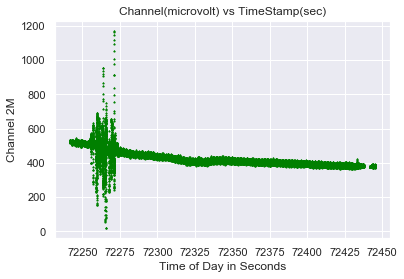

<Figure size 10800x10800 with 0 Axes>

In [416]:
#Scatterplot of Channel 2 Music_EEG
df_musicEEG.plot.scatter(x=int(4), y=int(1), s=4, c='green', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

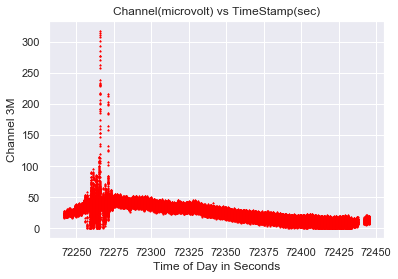

<Figure size 10800x10800 with 0 Axes>

In [417]:
#Scatterplot of Channel 3 Music_EEG
df_musicEEG.plot.scatter(x=int(4), y=int(2), s=4, c='red', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

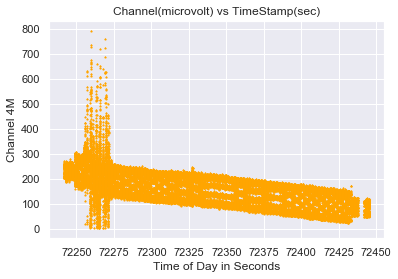

<Figure size 10800x10800 with 0 Axes>

In [412]:
#Scatterplot of Channel 4 Music_EEG
df_musicEEG.plot.scatter(x=int(4), y=int(3), s=4, c='orange', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

B. Reading_EEG

In [22]:
#Remove unwanted columns and generate scatterplots from uploaded dataframe file
df_readingEEG = pd.read_csv("tiny_eeg_self_experiment_reading_ML.csv", index_col="IndexId")
df_readingEEG.drop(["Ref1", "Ref2", "Ref3", "TS1", "TS2"], axis = 1, inplace = True)
data_readingEEG

,Channel 1R,Channel 2R,Channel 3R,Channel 4R
IndexId,,,,
0,963.44,281.28,71.98,401.54
1,1011.33,353.28,51.57,379.71
2,979.95,321.36,107.42,440.38
3,934.42,262.01,111.16,441.09
4,996.12,306.95,52.48,386.58
5,1004.17,334.47,86.05,419.24
6,950.03,281.23,120.18,444.21
7,969.08,302.25,68.74,394.68
8,1002.34,324.99,82.69,412.16


<Figure size 10800x10800 with 0 Axes>

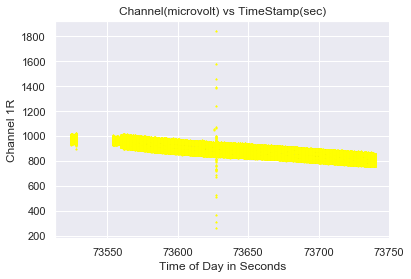

<Figure size 10800x10800 with 0 Axes>

In [418]:
#Scatterplot of Channel 1 Reading_EEG
df_readingEEG.plot.scatter(x=int(4), y=int(0), s=4, c='yellow', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

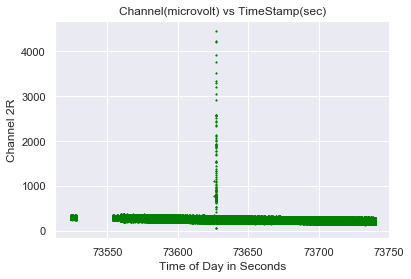

<Figure size 10800x10800 with 0 Axes>

In [420]:
#Scatterplot of Channel 2 Reading_EEG
df_readingEEG.plot.scatter(x=int(4), y=int(1), s=4, c='green', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

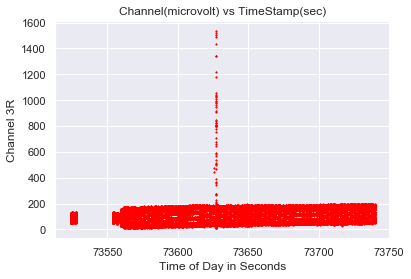

<Figure size 10800x10800 with 0 Axes>

In [421]:
#Scatterplot of Channel 3 Reading_EEG
df_readingEEG.plot.scatter(x=int(4), y=int(2), s=4, c='red', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

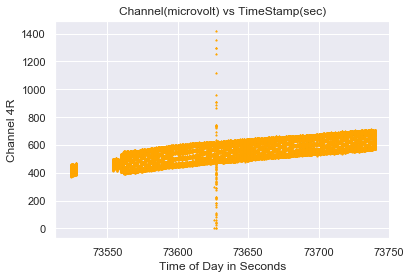

<Figure size 10800x10800 with 0 Axes>

In [422]:
#Scatterplot of Channel 4 Reading_EEG
df_readingEEG.plot.scatter(x=int(4), y=int(3), s=4, c='orange', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

# Comparison of Reading EEG data vs Music EEG data

In [23]:
#Load Modified Music_EEG vs Reading_EEG CSV file
data_music_vs_reading_EEG = pd.read_csv("tiny_eeg_self_experiment_music_vs_reading_ML.csv")
data_music_vs_reading_EEG.head()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Channel 1R,Channel 2R,Channel 3R,Channel 4R
0,933.19,519.23,21.71,238.45,963.44,281.28,71.98,401.54
1,932.94,516.98,22.70,251.80,1011.33,353.28,51.57,379.71
2,827.70,521.87,17.26,207.42,979.95,321.36,107.42,440.38
3,893.26,519.82,18.90,219.49,934.42,262.01,111.16,441.09
4,953.94,520.69,21.88,252.06,996.12,306.95,52.48,386.58


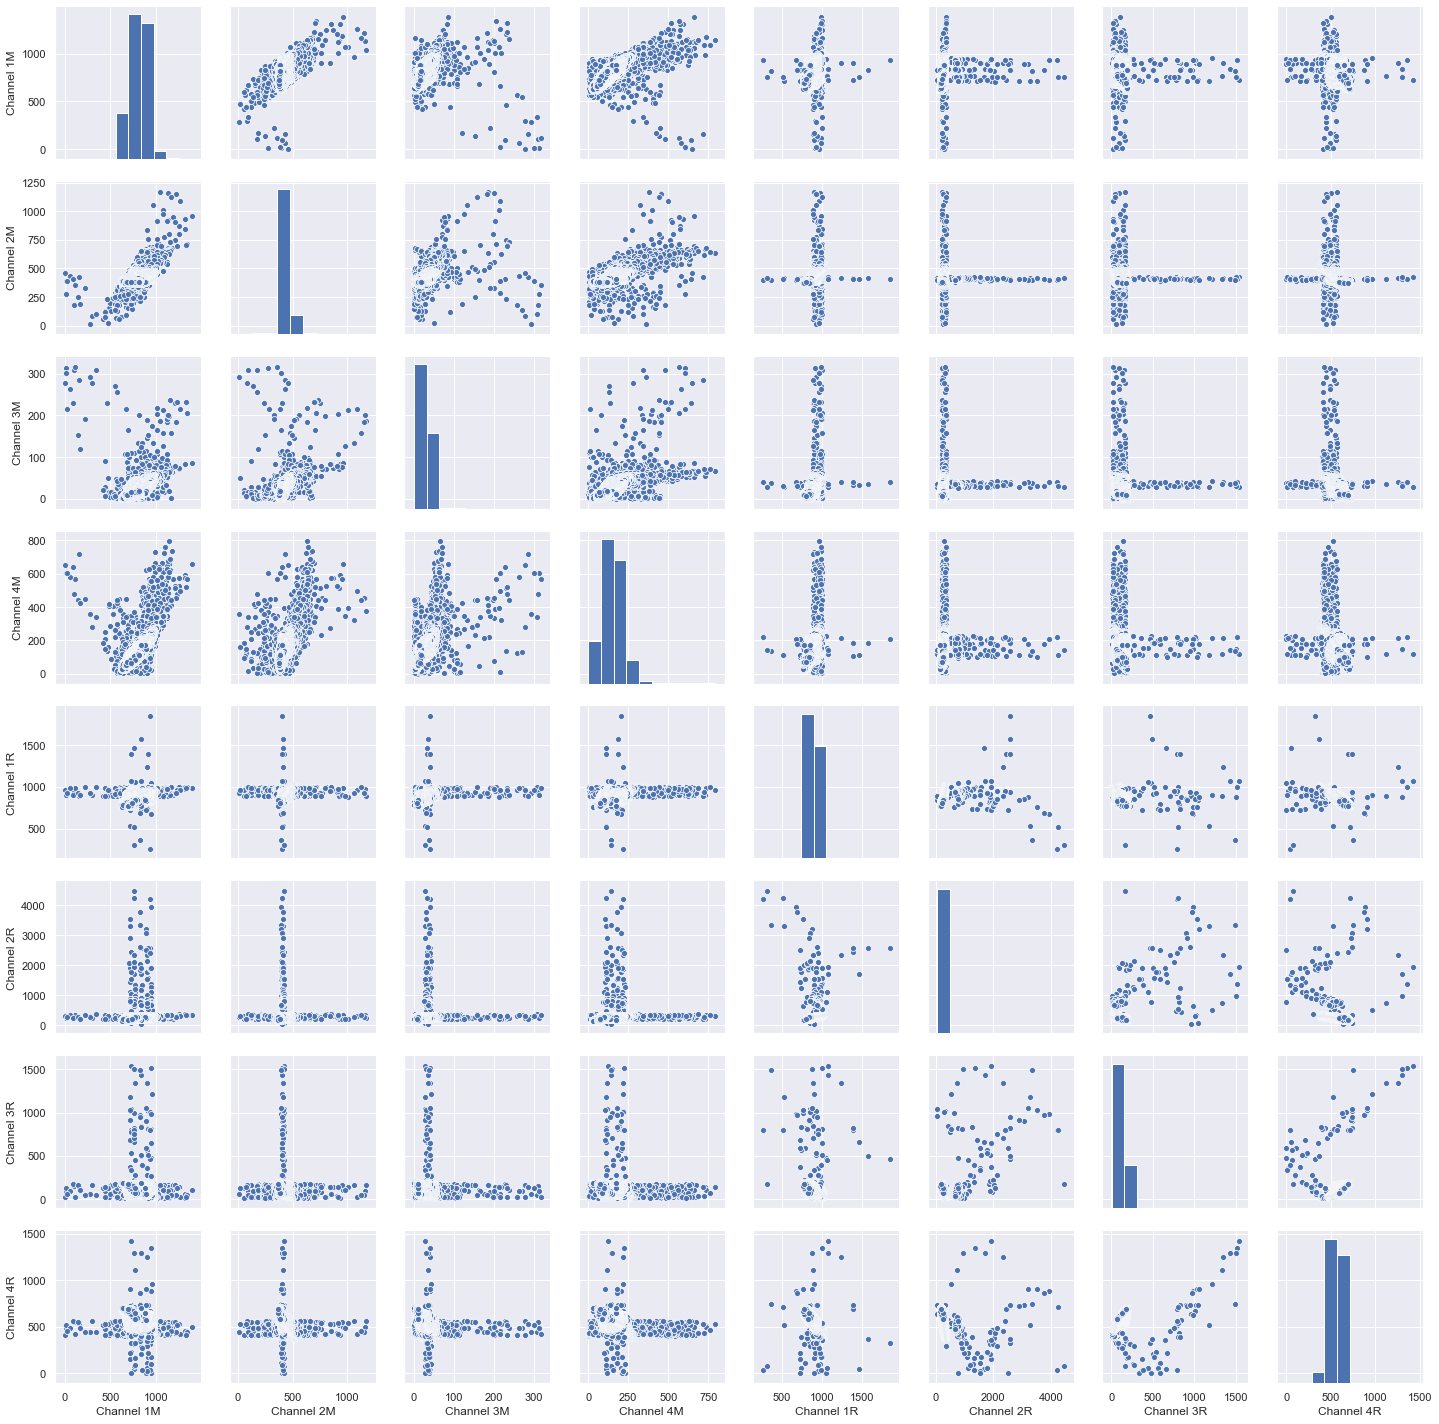

In [423]:
#application of pair plot command for comparative analysis between channels in each task
sns.pairplot(data_music_vs_reading_EEG, hue=None)

# Reading vs Music EEG Heatmap Correlation

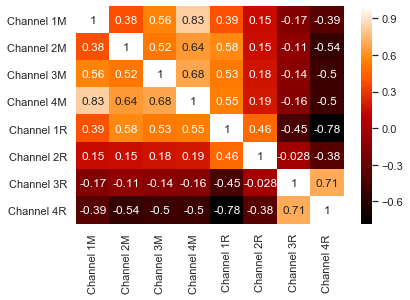

In [24]:
#Heatmap of Channel value comparison during mutually exclusive tasks: reading trials and music trials
import seaborn as sns; sns.set()
sns.heatmap(data_music_vs_reading_EEG.corr(), annot=True,  vmax=1.0, cmap='gist_heat')

# ClusterMap Analysis of the Reading vs Music EEG Channel Data

In [25]:
#Load Modified Music_EEG vs Reading_EEG with Time converted to seconds CSV file
data_music_vs_reading_EEG1 = pd.read_csv("tiny_eeg_self_experiment_music_vs_reading_ML_1.csv")
data_music_vs_reading_EEG1.drop(["Time"], axis = 1, inplace = True)
data_music_vs_reading_EEG1.head()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Channel 1R,Channel 2R,Channel 3R,Channel 4R
0,933.19,519.23,21.71,238.45,963.44,281.28,71.98,401.54
1,932.94,516.98,22.70,251.80,1011.33,353.28,51.57,379.71
2,827.70,521.87,17.26,207.42,979.95,321.36,107.42,440.38
3,893.26,519.82,18.90,219.49,934.42,262.01,111.16,441.09
4,953.94,520.69,21.88,252.06,996.12,306.95,52.48,386.58


In [26]:
#number of rows and columns
data_music_vs_reading_EEG1.shape

(38255, 8)

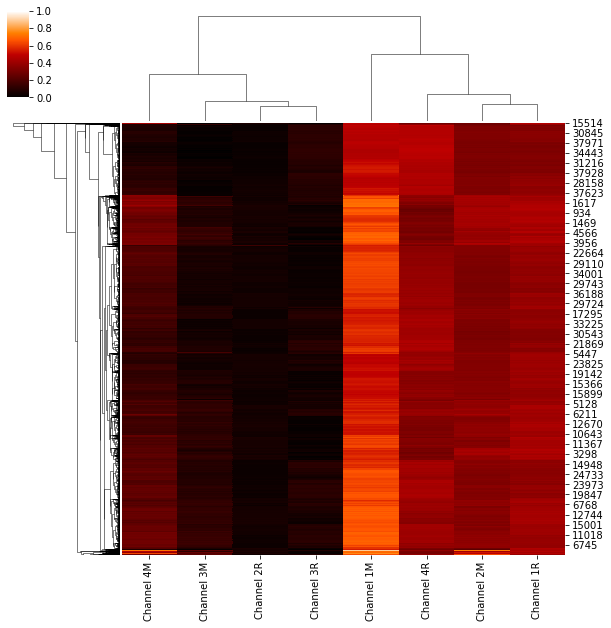

In [60]:
#Plot a Clustermap using sns command to determine similarity amongst channel values throughout each trial
sns.clustermap(data_music_vs_reading_EEG1, standard_scale=1, col_cluster=True, cmap="gist_heat")

Text(0.5, 0, 'Microvolts')

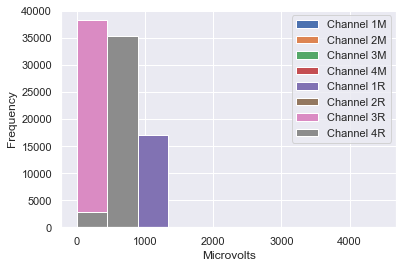

In [309]:
data_music_vs_reading_EEG1.plot.hist()
plt.xlabel('Microvolts')

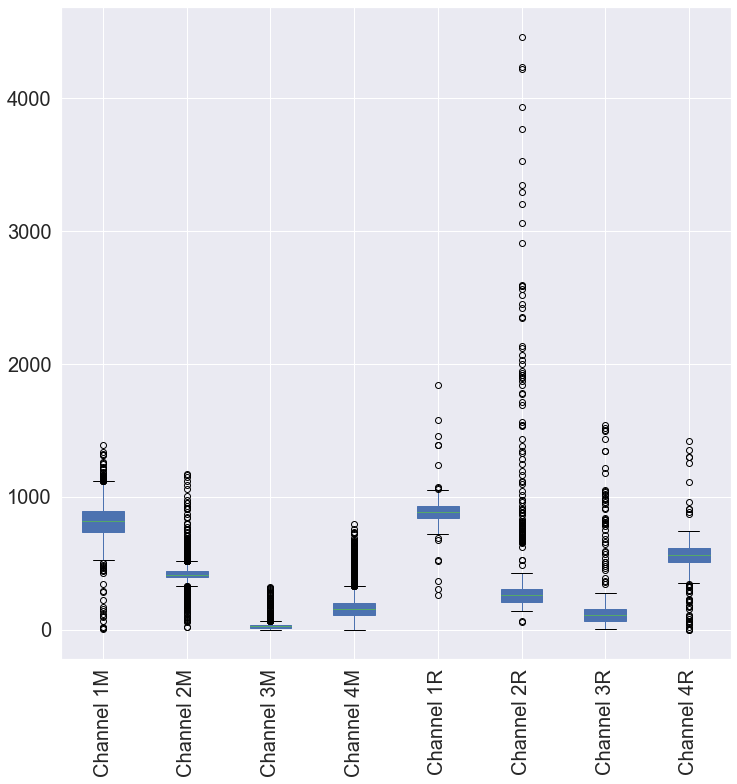

In [308]:
data_music_vs_reading_EEG1.boxplot(fontsize=20,rot=90,figsize=(12,12),patch_artist=True)

In [473]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import svm

In [545]:
data_C = pd.read_csv('tiny_eeg_self_experiment_music_vs_reading_ML_1.csv')
print(data_C.shape)
print(list(data_C.columns))

(38255, 9)
['Time', 'Channel 1M', 'Channel 2M', 'Channel 3M', 'Channel 4M', 'Channel 1R', 'Channel 2R', 'Channel 3R', 'Channel 4R']


In [500]:
#Train_test Split
# y variable
y = data_C['Time']
#x variable
X = data_C.drop(columns=['Time'])

In [501]:
# Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors=8)
#classifier fit to data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [502]:
#show prediction
prediction=knn.predict(X_test)[0:193]
print (prediction)

[ 56  84 146  13  99 154 186  39  21 125   4 123  77  95  57  78  43  31
 160 164  77  96  58  26 175  65  60  62 150 143 104 180  70  35  78 181
 106  98  83 143  96 159 140  78 142  71  26 138 171  74  47 115 167  68
 153 174  33 121 111  23  16  46  56   7 141 108  13 159   6 145  79 102
  37  64  33  99  10  45 117 163  12  28  64 181 109  22   4  65  45  69
  35 152 136 136 157 125  58 174  57   7   6 167 166 131  26  54  80 189
  60  14 122  39  18 167 169 139  94 124 171   9 142 137  26 164  77  21
  54  87  20 158  68  19  73 157  18 154 153 107  47 179 144 180  27 185
  38  73  26  31 109 187  87 116 145 174  36 125  47  87  24 139 139   6
 160  15 189 115  93 104 141  75  31 160 165  47  10 179 116  43 111 146
 138 133 123  20  82 108 161  88 100 135 141  38 117]


In [503]:
#accuracy of the model
score=knn.score(X_test, y_test)
print(score)

0.4936609593517187


In [504]:
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=None)
print(cv_scores)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.34589228 0.47010827 0.39273356]


In [505]:
#averaging of cv_scores
print('cv_scores mean:{}'. format(np.mean(cv_scores)))

cv_scores mean:0.4029113727060197


In [506]:
#KMeans analysis
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[4 4 6 ... 0 0 2]


# Averaging by Time variable

In [294]:
df = data_C.groupby('Time').mean()
df.head()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Channel 1R,Channel 2R,Channel 3R,Channel 4R
Time,,,,,,,,
1,890.575098,524.999216,22.887451,234.186471,975.427647,304.526078,88.723529,416.864902
2,885.007889,520.873116,23.668040,228.641759,977.174673,305.699397,89.518643,418.439849
3,883.583980,520.568905,24.155124,232.863134,976.378358,305.271095,91.936766,421.579154
4,878.935528,518.056231,26.785729,230.710653,977.575729,305.384724,90.136834,422.329698
5,884.666131,519.089799,25.768744,236.963166,978.234523,305.230101,91.133668,424.460854


In [298]:
correlations = df.corr()
print(correlations)

            Channel 1M  Channel 2M  Channel 3M  Channel 4M  Channel 1R  \
Channel 1M    1.000000    0.920883    0.836649    0.972390    0.981169   
Channel 2M    0.920883    1.000000    0.651892    0.948199    0.928100   
Channel 3M    0.836649    0.651892    1.000000    0.795510    0.812187   
Channel 4M    0.972390    0.948199    0.795510    1.000000    0.964006   
Channel 1R    0.981169    0.928100    0.812187    0.964006    1.000000   
Channel 2R    0.414271    0.342261    0.362793    0.390936    0.417950   
Channel 3R   -0.530185   -0.566164   -0.413079   -0.542383   -0.551512   
Channel 4R   -0.969793   -0.938354   -0.777793   -0.955196   -0.993498   

            Channel 2R  Channel 3R  Channel 4R  
Channel 1M    0.414271   -0.530185   -0.969793  
Channel 2M    0.342261   -0.566164   -0.938354  
Channel 3M    0.362793   -0.413079   -0.777793  
Channel 4M    0.390936   -0.542383   -0.955196  
Channel 1R    0.417950   -0.551512   -0.993498  
Channel 2R    1.000000    0.519243   -0

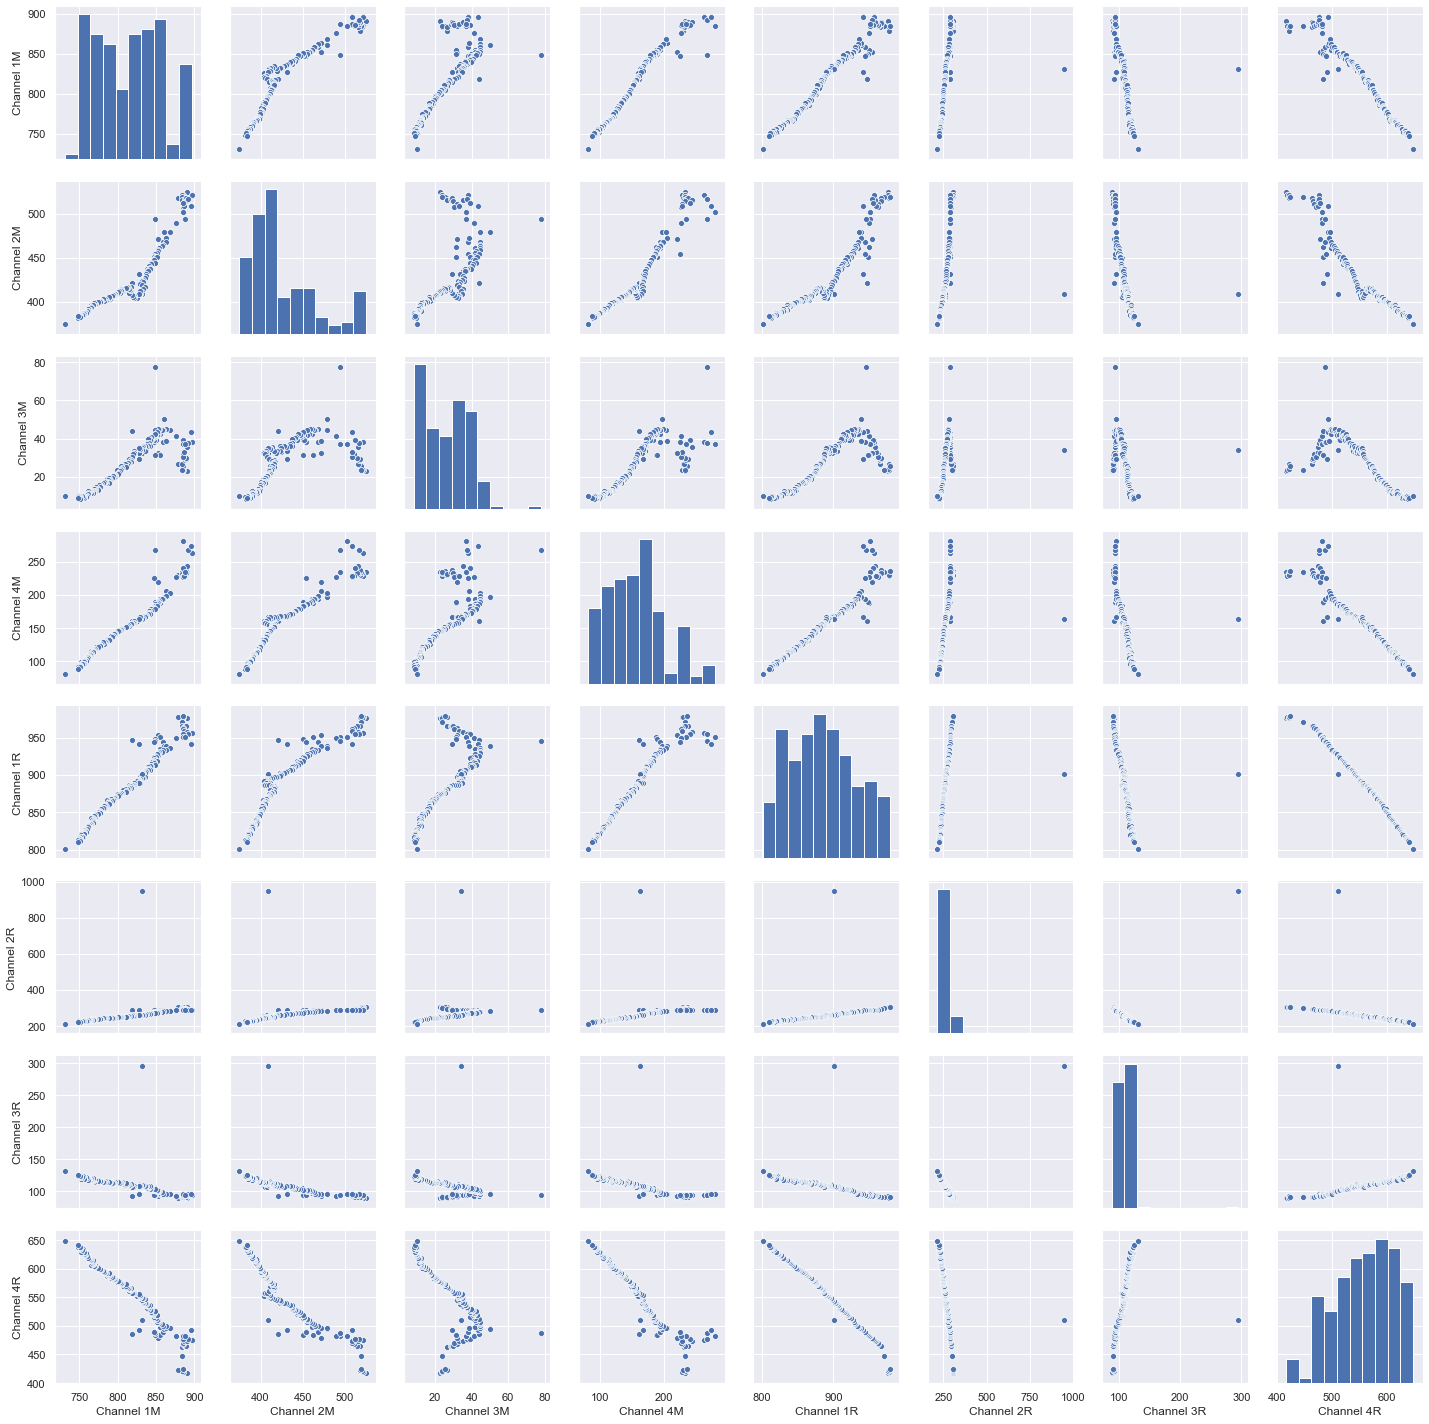

In [303]:
#application of pair plot command for comparative analysis between channels in each task
sns.pairplot(df, hue=None)

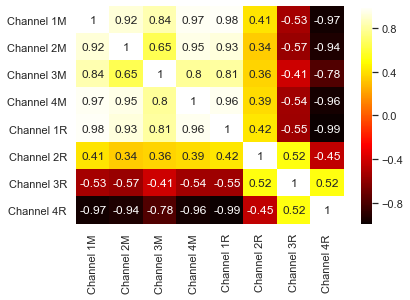

In [295]:
import seaborn as sns; sns.set()
sns.heatmap(df.corr(), annot=True,  vmax=1.0, cmap="hot")

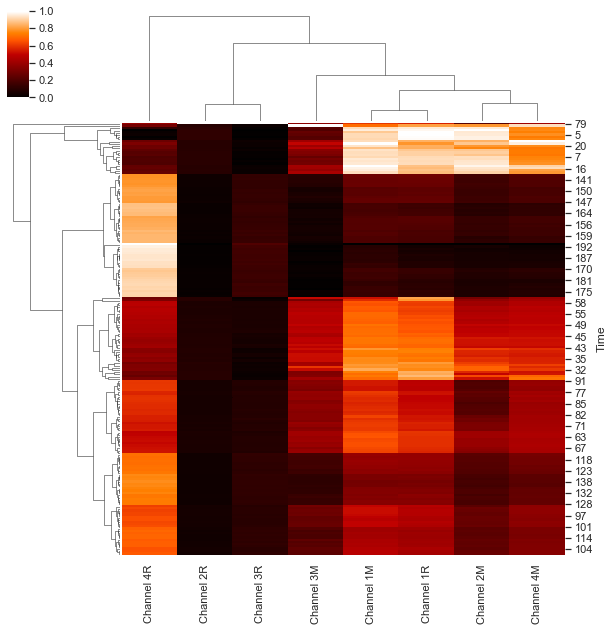

In [296]:
#Plot a Clustermap using sns command to determine similarity average channel values per second
sns.clustermap(df, standard_scale=1, col_cluster=True, cmap="gist_heat")

Text(0.5, 0, 'Microvolts')

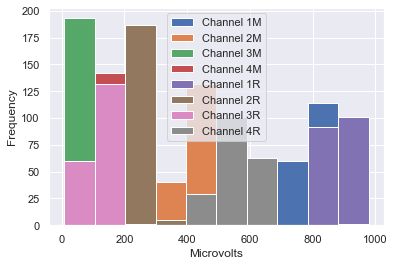

In [302]:
df.plot.hist()
plt.xlabel('Microvolts')

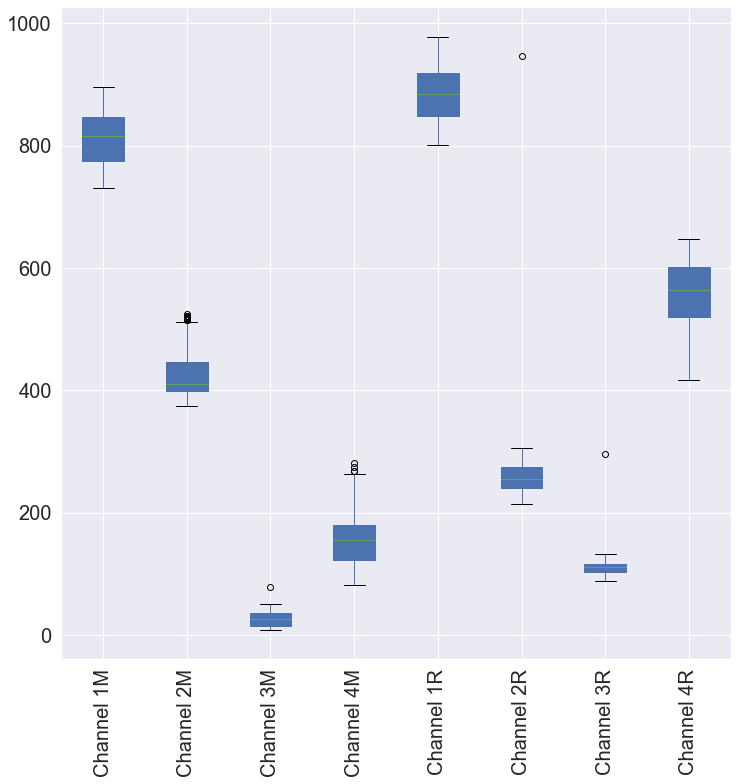

In [307]:
df.boxplot(fontsize=20,rot=90,figsize=(12,12),patch_artist=True)

In [276]:
df.describe()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Channel 1R,Channel 2R,Channel 3R,Channel 4R
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,813.670534,425.806126,26.096265,156.102570,885.636837,260.827635,110.205025,557.649589
std,42.419521,38.656001,12.257296,43.651748,45.229364,54.023366,16.454743,54.181166
min,731.262500,374.915000,8.476294,81.192500,801.560000,214.320000,88.723529,416.864902
25%,774.273284,399.515779,14.663518,121.656935,847.856866,240.352040,103.174378,519.604873
50%,816.416368,410.984328,26.581357,155.249538,884.753881,255.344410,110.695431,563.830896
75%,847.580000,445.523383,35.904876,179.283737,918.888806,274.784328,116.445373,601.920796
max,896.643682,524.999216,77.744876,280.873134,978.234523,945.989254,295.384776,648.065000


## Eureka!!!!!!
Analysis of the data when considering each individual data point in comparison to the averaging of the data points by the time variable per channel showed the averaging sequence provides more reliable data. This data will be used to conduct further correlation and regression analysis. 

In [507]:
df_analysis = pd.read_csv('timeaverage.csv', index_col= "Index")
df_analysis.head()

,Time,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Channel 1R,Channel 2R,Channel 3R,Channel 4R
Index,,,,,,,,,
1,1,890.575098,524.999216,22.887451,234.186471,975.427647,304.526078,88.723529,416.864902
2,2,885.007889,520.873116,23.668040,228.641759,977.174673,305.699397,89.518643,418.439849
3,3,883.583980,520.568905,24.155124,232.863134,976.378358,305.271095,91.936766,421.579154
4,4,878.935528,518.056231,26.785729,230.710653,977.575729,305.384724,90.136834,422.329699
5,5,884.666131,519.089799,25.768744,236.963166,978.234523,305.230100,91.133668,424.460854


In [508]:
#Train_test Split
# y variable
y = df_analysis['Time']
#x variable
X = df_analysis.drop(columns=['Time'])

In [542]:
# Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
#classifier fit to data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [543]:
#show prediction
prediction=knn.predict(X_test) 
print (prediction)

[ 43  69 161  35 183  10 121  80 112 176 173 127  26  11 108  64  14  50
  31 175  46   2  96 187  55 108 152  80  51 130  64 116  58  81 186  14
  38  13 164]


In [ ]:
#accuracy of the model
score=knn.score(X_test, y_test)
print(score)

# DISAPPOINTING FINDINGS!!!!

# Analysis and conclusion
Although using the average time variables provided better data analysis for graph production, it did skew the data once the KNN analysis was run. It was seen that the averaging caused the representation of the dataset to have an accuracy of 0. This in theory would be correct since averaging the data does not allow for the full observation for the behavior of the data. However, the main issue with the original dataset was the inaccuracy of the values. Many of the values had to be recalculated using the absolute value function, as it is known that voltage cannot be negative. 

The negative values along with the low values of channel 3 and channel 4 for both the reading and music eeg studies was a prime indicator that the methods of the study could not be tested. However, using the dataset after conducting the absolute value calcultions the cross validation and cluster analysis were predicted satisfactorily. In order, to improve the precision of the given experiment, the reading and music eeg studies should be repeated atleast for 10 independent trials each. 